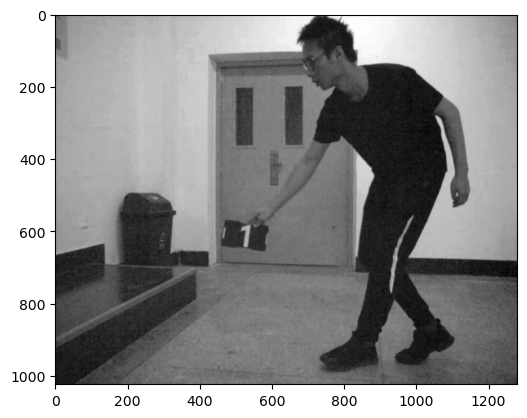

In [2]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
from need import plt_show
from need import plt_show0
from need import gray_guss
# 读取待检测图片
origin_image = cv2.imread('../res/img1.png')
# 复制一张图片，在复制图上进行图像操作，保留原图
image = origin_image.copy()
# 图像去噪灰度处理
gray_image = gray_guss(image)
plt_show(gray_image)




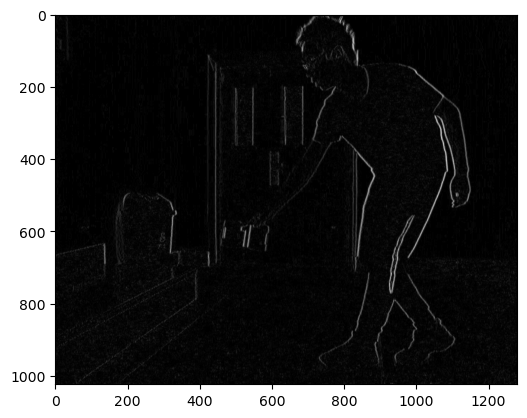

In [3]:
# x方向上的边缘检测（增强边缘信息）
Sobel_x = cv2.Sobel(gray_image, cv2.CV_16S, 1, 0)
absX = cv2.convertScaleAbs(Sobel_x)
image = absX
plt_show(image)


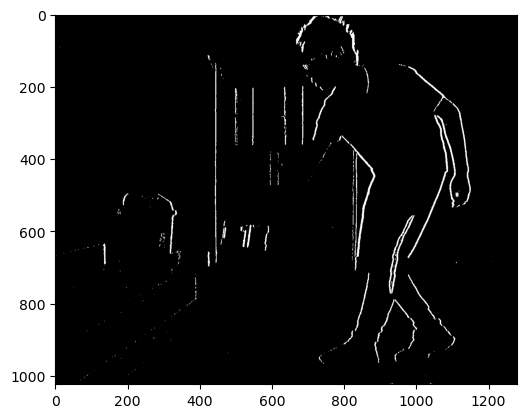

In [4]:
# 图像阈值化操作——获得二值化图
ret, image = cv2.threshold(image, 0, 255, cv2.THRESH_OTSU)
plt_show(image)



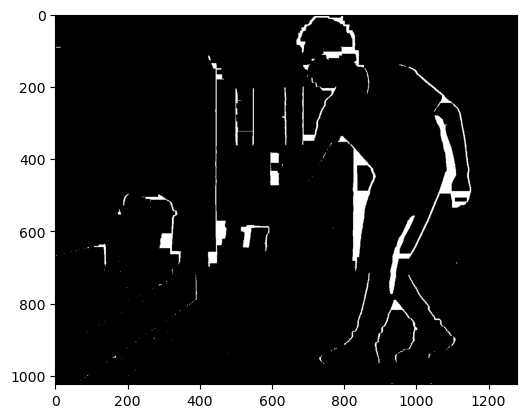

In [5]:
# 形态学（从图像中提取对表达和描绘区域形状有意义的图像分量）——闭操作
#(30,10)
kernelX = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 10))
image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernelX,iterations = 1)
plt_show(image)

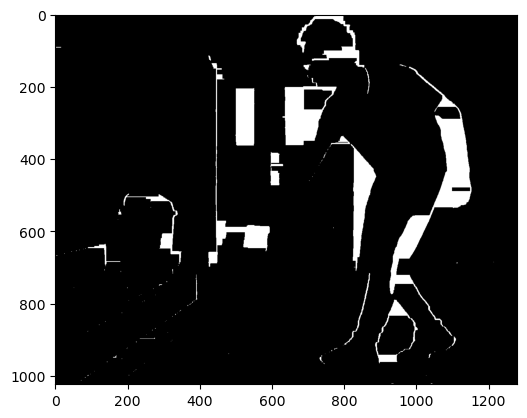

In [6]:
#x方向进行闭操作（抑制暗细节）
kernelX = cv2.getStructuringElement(cv2.MORPH_RECT, (50, 1))
kernelY = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 20))
image = cv2.dilate(image, kernelX)
image = cv2.erode(image, kernelX)
plt_show(image)



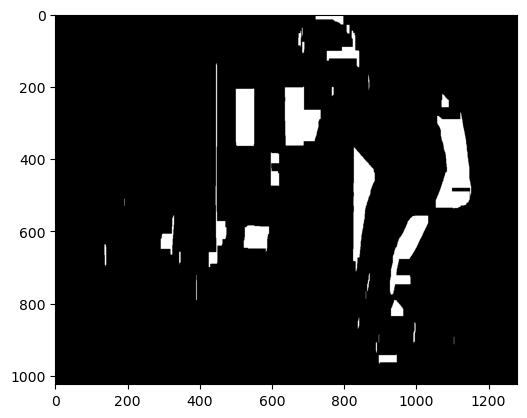

In [7]:
#y方向的开操作
image = cv2.erode(image, kernelY)
image = cv2.dilate(image, kernelY)
plt_show(image)


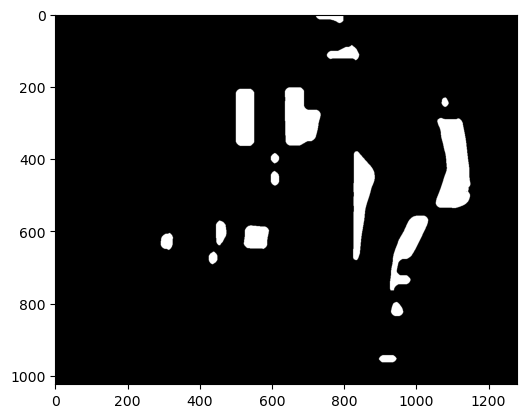

In [8]:
# 中值滤波（去噪）
image = cv2.medianBlur(image, 21)
# 显示灰度图像
plt_show(image)


[50, 20]


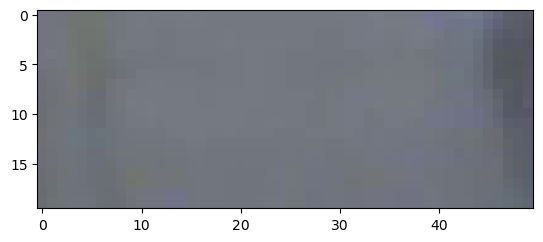

[34, 39]


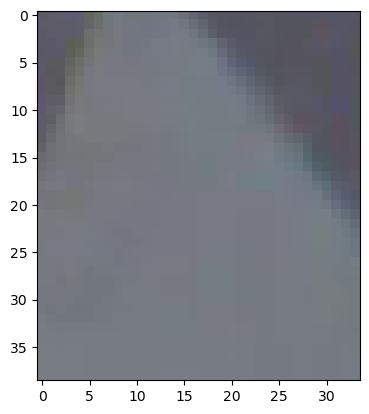

[24, 36]


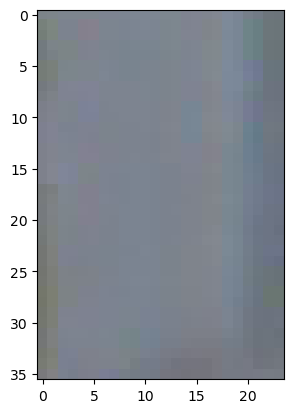

[34, 47]


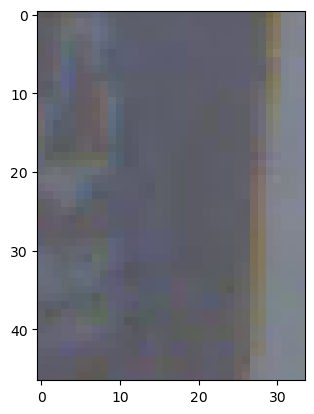

[70, 65]


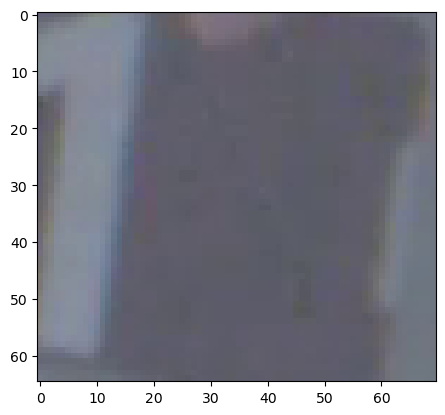

[29, 69]


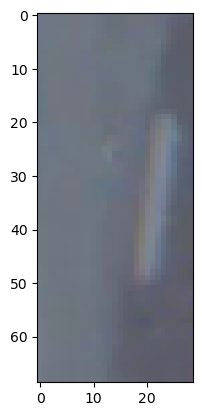

[106, 207]


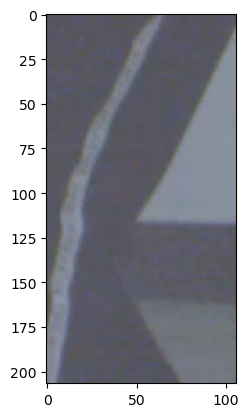

[23, 41]


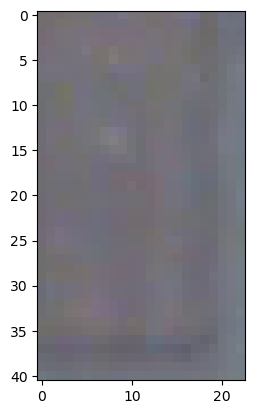

[23, 29]


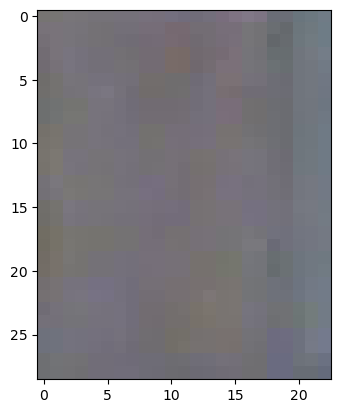

[60, 301]


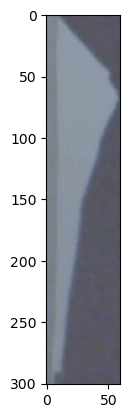

[96, 250]


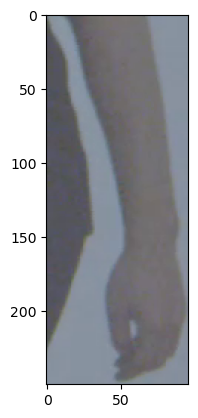

[20, 26]


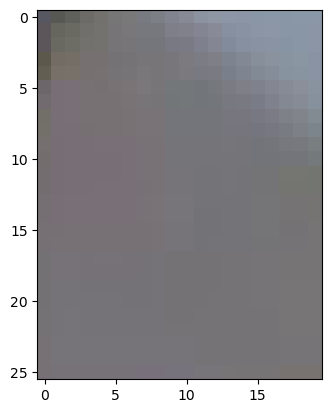

[51, 158]


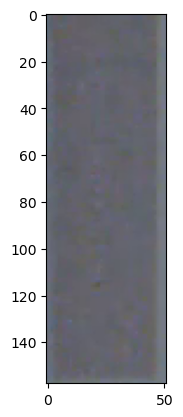

[99, 161]


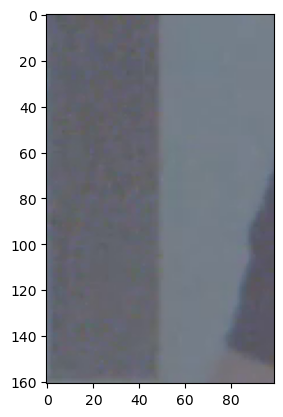

[90, 42]


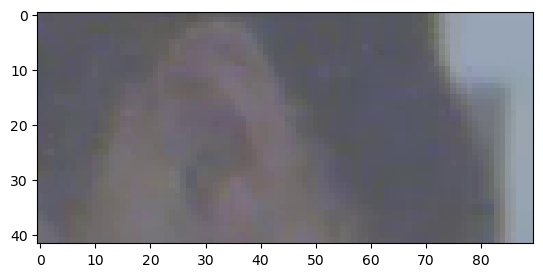

[77, 25]


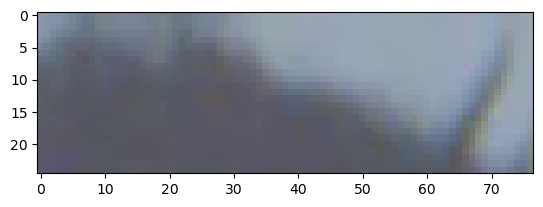

In [9]:
#copy
imgc=image.copy()
img_list=[]
info_list=[]
# 获得轮廓,target=(70,65)
contours, hierarchy = cv2.findContours(imgc, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for item in contours:
    rect = cv2.boundingRect(item)
    x = rect[0]
    y = rect[1]
    weight = rect[2]
    height = rect[3]
    eachlist=[weight,height]
    info_list.append(eachlist)
    img_list.append(origin_image[y:y+height,x:x+weight])

for i in range(16):
    print(info_list[i])
    plt_show0(img_list[i])

